<a href="https://colab.research.google.com/github/benstaf/ChatGPT-Next-Web/blob/main/RetinaFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install retina-face

In [15]:
#Import Retinaface, CV2 and Matplotlib
from retinaface import RetinaFace
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
#Download an Image file
from google.colab.patches import cv2_imshow
uploaded = files.upload()

Saving crowd-of-masked1.jpg to crowd-of-masked1 (1).jpg


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!cp -r "/content/drive/My Drive/Instagram_screenshots"/* /content/

In [16]:
!ls -lh /content/

total 13M
-rw-r--r-- 1 root root  12K Aug  2 10:03 downloaded_file
drwxr-xr-x 2 root root 4.0K Aug  2 10:06 downloads
drwx------ 5 root root 4.0K Aug  2 10:15 drive
drwxr-xr-x 1 root root 4.0K Jul 29 13:36 sample_data
-rw------- 1 root root 941K Aug  2 10:16 Screenshot_2025-08-02-08-27-18-603_com.instagram.android.jpg
-rw------- 1 root root 992K Aug  2 10:16 Screenshot_2025-08-02-08-35-12-241_com.instagram.android.jpg
-rw------- 1 root root 914K Aug  2 10:16 Screenshot_2025-08-02-08-36-13-796_com.instagram.android.jpg
-rw------- 1 root root 918K Aug  2 10:16 Screenshot_2025-08-02-08-36-50-724_com.instagram.android.jpg
-rw------- 1 root root 1.2M Aug  2 10:16 Screenshot_2025-08-02-08-57-57-949_com.instagram.android.jpg
-rw------- 1 root root 1.2M Aug  2 10:16 Screenshot_2025-08-02-09-15-40-385_com.instagram.android.jpg
-rw------- 1 root root 857K Aug  2 10:16 Screenshot_2025-08-02-09-15-50-178_com.instagram.android.jpg
-rw------- 1 root root 850K Aug  2 10:16 Screenshot_2025-08-02-09-19

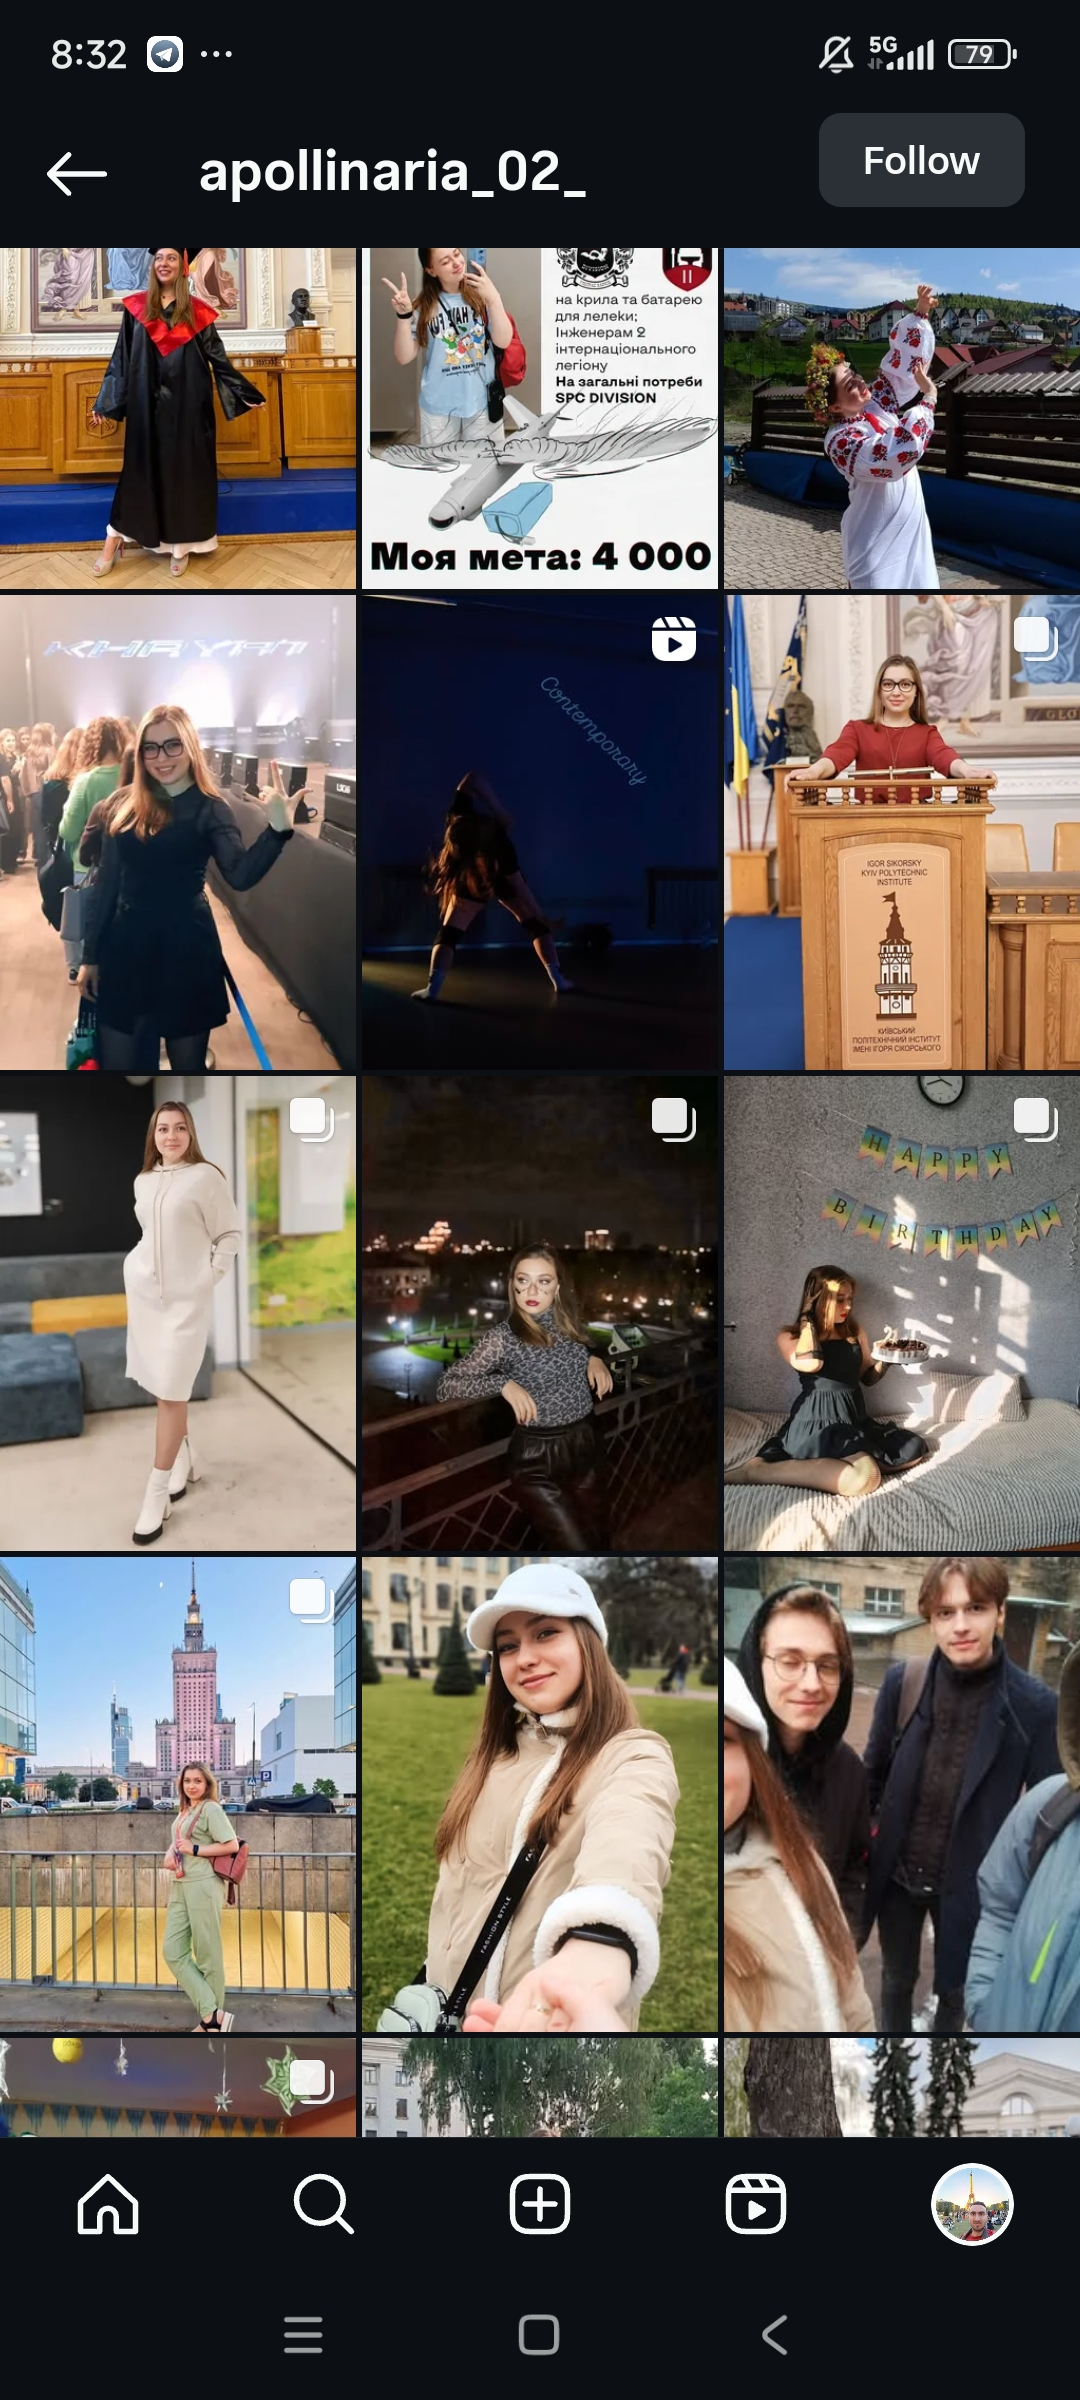

In [17]:
#Read and display the image
img = cv2.imread('/content/testimage.jpg')
cv2_imshow(img)

In [18]:
#Detect faces using RetinaFace
img_faces = RetinaFace.detect_faces(img)

Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5


25-08-02 10:18:06 - Directory /root/.deepface created
25-08-02 10:18:06 - Directory /root/.deepface/weights created
25-08-02 10:18:06 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


100%|██████████| 119M/119M [00:00<00:00, 249MB/s] 


In [19]:
#Iterate all objects key areas
for i in img_faces.keys():
  choose = img_faces[i]
  print(choose)

{'score': np.float64(0.9996107220649719), 'facial_area': [np.int64(760), np.int64(1616), np.int64(841), np.int64(1729)], 'landmarks': {'right_eye': [np.float32(788.41473), np.float32(1662.8278)], 'left_eye': [np.float32(827.1765), np.float32(1665.5685)], 'nose': [np.float32(810.4768), np.float32(1689.085)], 'mouth_right': [np.float32(786.4585), np.float32(1698.4078)], 'mouth_left': [np.float32(821.7188), np.float32(1700.9362)]}}
{'score': np.float64(0.999040424823761), 'facial_area': [np.int64(492), np.int64(1603), np.int64(582), np.int64(1711)], 'landmarks': {'right_eye': [np.float32(506.38287), np.float32(1646.7501)], 'left_eye': [np.float32(545.6272), np.float32(1635.3286)], 'nose': [np.float32(525.1476), np.float32(1661.0385)], 'mouth_right': [np.float32(518.14325), np.float32(1682.4362)], 'mouth_left': [np.float32(553.808), np.float32(1673.1318)]}}
{'score': np.float64(0.9986259341239929), 'facial_area': [np.int64(930), np.int64(1580), np.int64(995), np.int64(1663)], 'landmarks': 

In [20]:
#Iterate all objects key areas and mark only face area
for i in img_faces.keys():
  facial_parts = img_faces[i]
  #print(choose)
  recognize_face_area = facial_parts["facial_area"]
  cv2.rectangle(img, (recognize_face_area[2], recognize_face_area[3]), (recognize_face_area[0], recognize_face_area[1]), (255, 255, 255), 1)

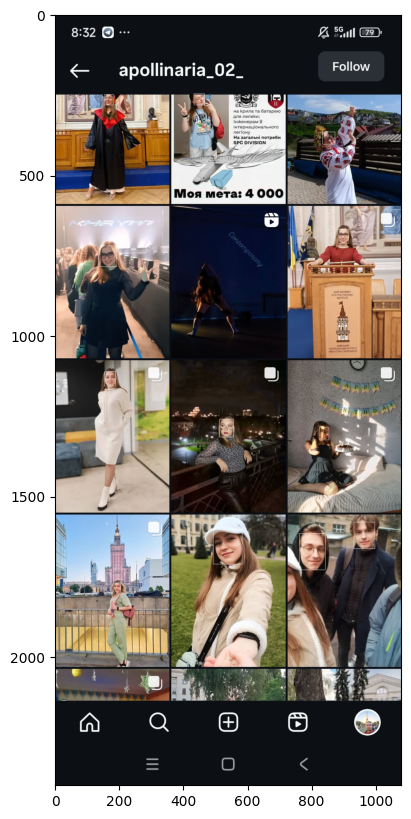

In [21]:
#Diplay Face Area
plt.figure(figsize= (10, 10))
plt.imshow(img[:, :, ::-1])
plt.show()

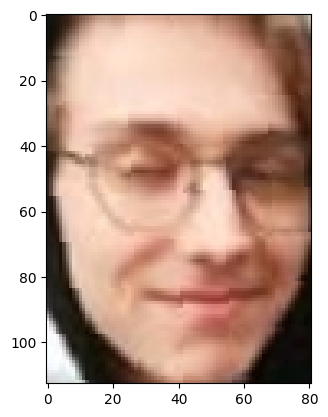

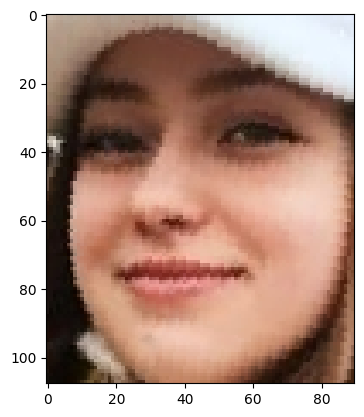

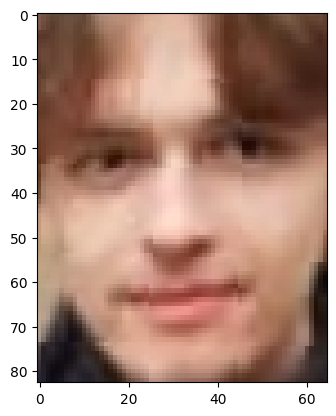

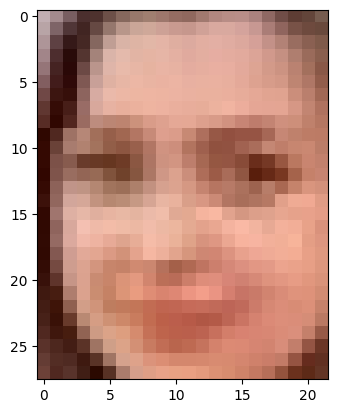

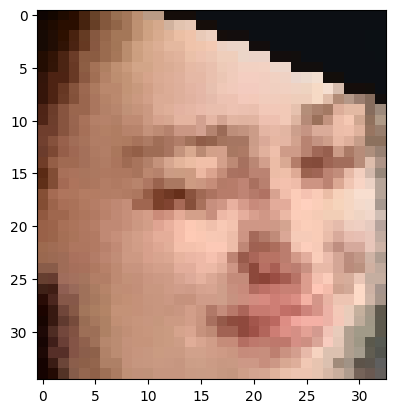

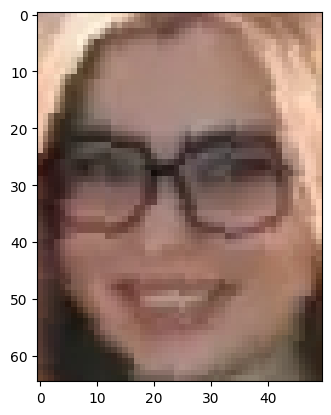

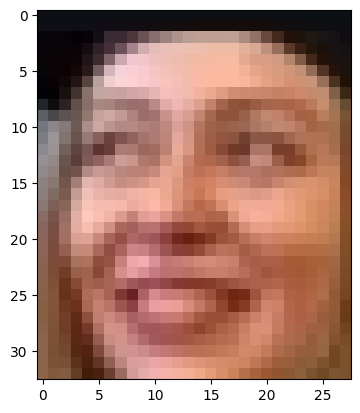

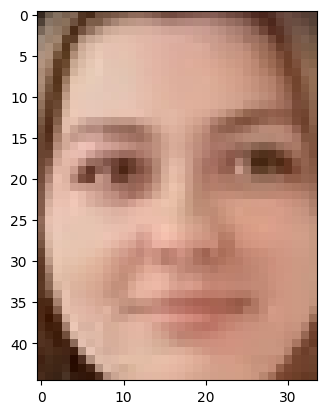

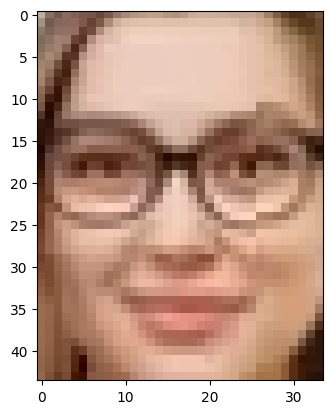

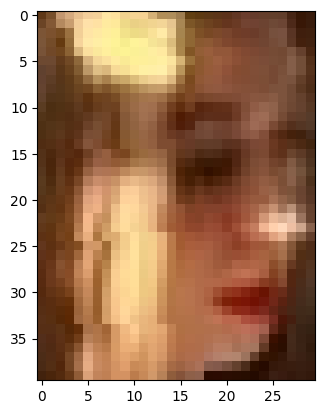

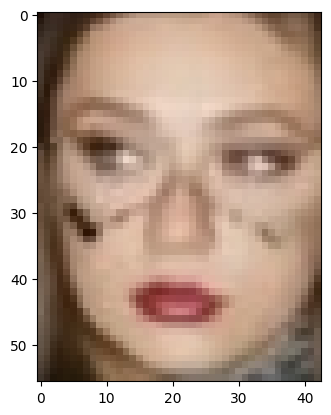

Skipping empty face.


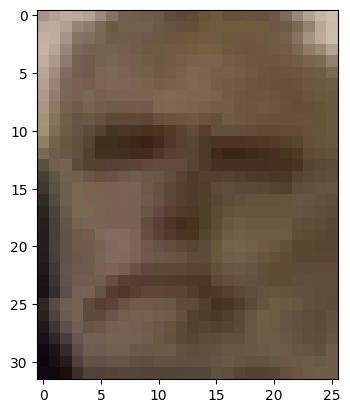

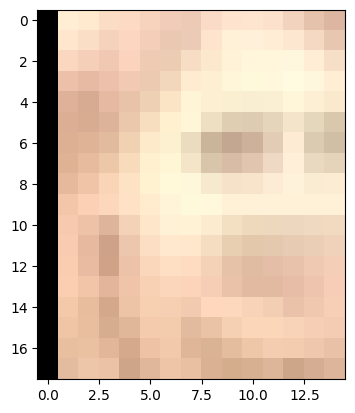

In [25]:
#Extract individual faces from the image
import matplotlib.pyplot as plt
ext_faces = RetinaFace.extract_faces(img_path = "/content/testimage.jpg", align = True)
for face in ext_faces:
  if face.size > 0: # Check if the extracted face is not empty
    plt.imshow(face)
    plt.show()
  else:
    print("Skipping empty face.") # Optional: print a message for empty faces

In [ ]:
!pip install transformers --quiet
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/372M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Face 0: Male ♂ (91.90% confidence)


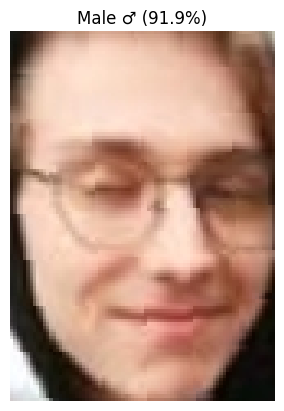

Face 1: Female ♀ (98.78% confidence)


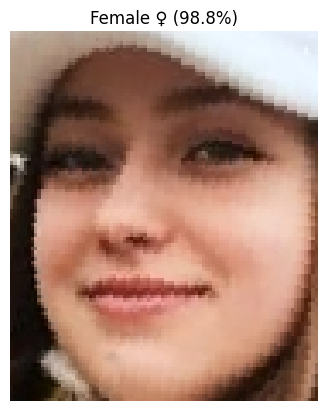

Face 2: Male ♂ (95.78% confidence)


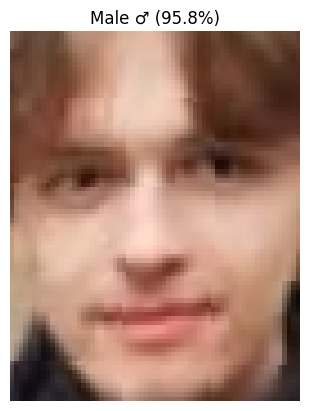

Face 3: Male ♂ (66.14% confidence)


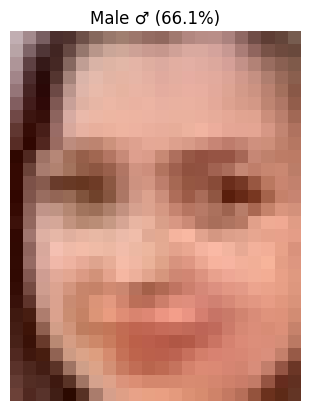

Face 4: Male ♂ (82.79% confidence)


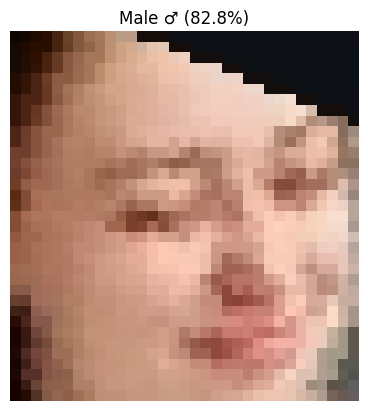

Face 5: Female ♀ (91.24% confidence)


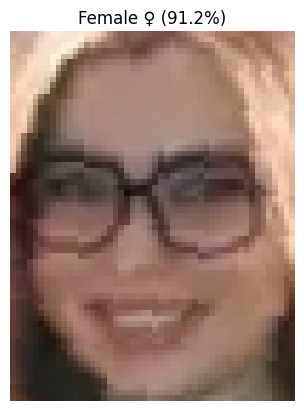

Face 6: Female ♀ (65.60% confidence)


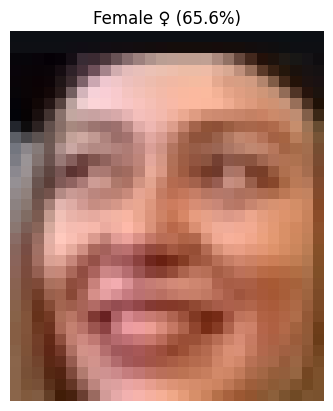

Face 7: Female ♀ (99.26% confidence)


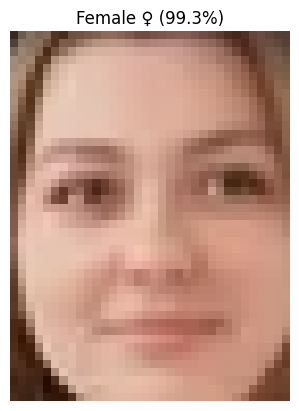

Face 8: Female ♀ (93.16% confidence)


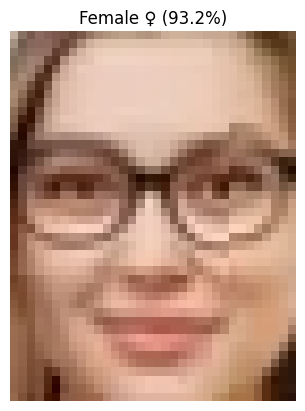

Face 9: Male ♂ (59.46% confidence)


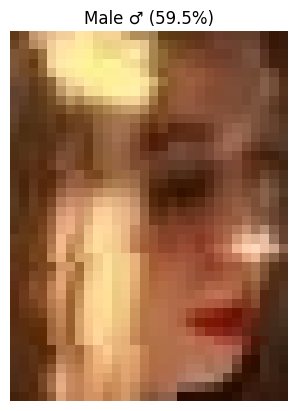

Face 10: Female ♀ (99.06% confidence)


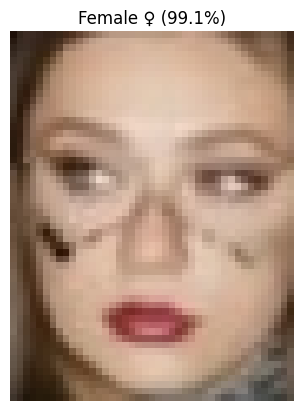

Skipping empty face 11
Face 12: Male ♂ (88.04% confidence)


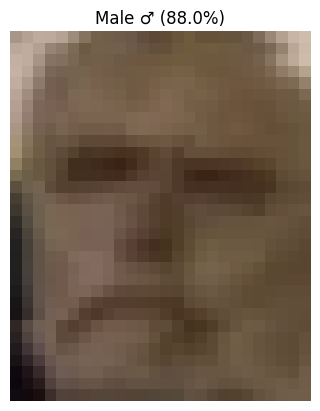

Face 13: Male ♂ (75.80% confidence)


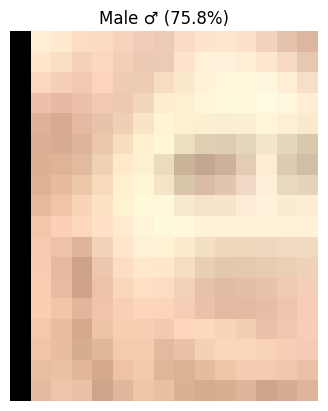

In [27]:


# Load a gender classification model (SigLIP-based, very accurate)
model = AutoModelForImageClassification.from_pretrained("prithivMLmods/Gender-Classifier-Mini")
processor = AutoImageProcessor.from_pretrained("prithivMLmods/Gender-Classifier-Mini")

# Run each face through the classifier
for i, face in enumerate(ext_faces):
    if face.size == 0:
        print(f"Skipping empty face {i}")
        continue

    # Convert NumPy face (from RetinaFace) to PIL Image
    face_pil = Image.fromarray(np.uint8(face)).convert("RGB")

    # Preprocess and predict
    inputs = processor(images=face_pil, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
        probs = F.softmax(logits, dim=1)
        pred = torch.argmax(probs).item()
        confidence = probs[0][pred].item()
        label = model.config.id2label[pred]

    # Show result
    print(f"Face {i}: {label} ({confidence:.2%} confidence)")
    plt.imshow(face_pil)
    plt.title(f"{label} ({confidence:.1%})")
    plt.axis('off')
    plt.show()

In [26]:
!pip install transformers --quiet
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch

In [29]:

found_male = False

for face in ext_faces:
    if face.size == 0:
        continue
    face_pil = Image.fromarray(np.uint8(face)).convert("RGB")
    inputs = processor(images=face_pil, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
        probs = F.softmax(logits, dim=1)
        pred = torch.argmax(probs).item()
        label = model.config.id2label[pred]
        confidence = probs[0][pred].item()

    if label.lower() == "male" and confidence > 0.8:
        found_male = True
        break

print("At least one male detected? ", found_male)

At least one male detected?  False
